# 1. Information about the submission

## 1.1 Name and number of the assignment 

***Text categorization: argument mining . Assignment 1***

## 1.2 Student name

***Georgy Mkrtchyan***

## 1.3 Codalab user ID

***georgeMK***

## 1.4 Additional comments

***Enter here** any additional comments which you would like to communicate to a TA who is going to grade this work not related to the content of your submission.*

# 2. Technical Report

*Use Section 2 to describe results of your experiments as you would do writing a paper about your results. DO NOT insert code in this part. Only insert plots and tables summarizing results as needed. Use formulas if needed do described your methodology. The code is provided in Section 3.*

## 2.1 Methodology 

1. Data Preparation
The first step of the analysis of the argument mining problem on the dataset of Russian sentences about Coronavirus flu 3 datasets were provided:
a)Train set: Dependent and independent variables – 6717 observations
b) Validation set: Independent variable - 1431 observations c) Test set: Independent variable – 1402 observations
Provided data was preprocessed based on the NLTK package, i.e., the all the words were made lowercase and prepositions, pronouns and other common words were removed to reduce the noise in the future embeddings and to improve the performance of the embedder.
2. Tokenization and creation of embeddings
Next step was associated to creation of the embeddings on the basis of each sentence. As a main model for creation of the sentence vectors It was chosen to use TF-IDF and BertSentence Embedder with 'DeepPavlov/rubert-base-cased-sentence' pretrained corpus. Since sentences are not very long it was decided to use vector size of 20 with rolling window of 5 words. Then, a model was trained on the tokenized vectors from the training dataset via implementation of 200 epochs, which resulted in appearance of the independent variables matrices of (6717,20),and (1402,20) for the Train and Test set accordingly.
3. Target variables
There were 6 types of Target variables: with 3 topics: quarantine, masks, vaccine for each presence of stance and argument was marked with following labels :
a. "For" (3)
b. "Against" (1)
c. "Other” (for stance, this class merges classes “neutral”,
“unclear” or “for and against”) / “no argument” (for an
argument) (2)
d. "Irrelevant" (for this claim) (0)
Investigation work on the target variables shown that all the independent variables are highly imbalanced: approximately ‘Irrelevant’ – 69% , ‘Other’ – 20%, ‘For’ – 8.75%, ‘Against ‘– 2.25%

### вставить картинку

As long as the imbalance of the classes is severe 69% highest vs 2.25% lowest and there is not so much data, it was decided to use Synthetic Minority Oversampling Technique (SMOTE), the approach looks for the minority classes and using K-nearest neighbors creates synthetic features for the classes with lack of observations, therefore, resulting in the balanced data. Absence of such an approach to deal with imbalanced classes problem would have led to the fact that all the classifiers would predict only the presence of majority class.


4. Modelling

Provided baseline algorithm was based on the DeepPavlov/rubert-base- cased-sentence pretrained BERT and finetuned model on the BERT embeddings with weighted f1-score along all the target variables of 0.44 . So, it was decided to compare the performance of statistical NLP approaches in ensemble with classical classification algorithms with NN- based approach.
As candidates classification algorithms 3 approaches were chosen: Logistic Regression with L1 regularization, Random Forest and Gradient Boosting. During the validation process the best result was shown by Ridge algorithm with an average of 0.4 f1-score on the validation, while Random Forest and Gradient Boosting failed to distinguish between classes and always resulted in the production of the same class prediction. 
To begin with, first method was chosen to be logistic regression, without any oversampling the result was around 35% average f1 score for both stance and argument.However, even logistic legression with any tuning was able to get closer to baseline level metric after introduction of SMOTE oversampling.

Then, it was decided to go through the different parameters and find the best combination. Via grid search it was obtained that the best regularization technique was L2 as it outperformed L1 for all same parameters. During grid search I iterated over differen regularization parameters:[3,4,5,7,10] also it was decided to choose optimizer between "saga" and "newton-cg". As it was found was a bit slower, however, it showed better performance for all searchable regularization parameters, with best performance for TF-IDF with f1average scores 0.5023-stance	0.4518-argument.

Also, I produced some experiments with fasttext model,which accounts for word n-grags as main features, however its performance was much worse than for any logistic regression with SMOTE oversampling, thus I left this approach.

Next, approach chosen was Voting classifier.Generally,  voting classifier is a simple ensembling technique which takes several different simple algorithms and takes the mode of their predictions. Such an approach helps to reduce variability in predictions associated with model specific behaviour.In our case I trained 2 different voting classifiers for 2 types of embeddings:
  1. **voting1**: LogReg(C=3,penalty='l2')+LogReg(C=10,penalty='l2')+LogReg(C=5,penalty='l2')+RandomForest(max_depth=4,n_estimators=50)+RandomForest(max_depth=8,n_estimators=50)
  2. **voting2**: LogReg(C=3,penalty='l2')+LogReg(C=10,penalty='l2')+LogReg(C=5,penalty='l2')
  3. **voting3**: LogReg(C=3,penalty='l2')+RandomForest(max_depth=8,n_estimators=50)







## 2.2 Discussion of results

***Enter here** a discussion of results and a summary of the experiment. Here we want to see the final table with comparison of the baseline and all tried approaches you decided to report. Even if some method did not bring you to the top of the leaderboard, you should nevertheless indicate this result and a discussion, why, in your opinion, some approach worked and another failed. Interesting findings in the discussion will be a plus.*

  Method | Score |
  --- | --- |
  Baseline | 0.4180 
  logreg_l1_C2 | 0.471
  logreg_l2_C6| 0.4931
  logreg_l2_C5|	0.5023
  logreg_l2_C3| 0.5012	
  rf_max_depth_5_estimators_200 | 0.3795	
  logreg_l2_C4| 0.4998
  logreg_l2_C7|0.4976		
  voting1| 0.5022	
  voting2| 0.497
  voting3| 0.486
  fasttext| 0.37

As we can see the best result was shown by the Ridge Regression with regularization parameter of 5 and newton-cg solver.

As I metnioned above i also tried to induce some new tokens in the sentences , in order to help to withdraw additional info by algoryithms about presence of the discussion about either quarantine, masks or vaccines .However, such an approach did not show any effectiveness, since the best result was again obtained on Ridge Regression with regularization parameter of 5 and equaled 
0.0756 which is 7 times lower than the best result.

Also,I tried to artificially create new sentences via machine translation.More precisely, 2 lowest appeared classes were subject to triple machine translation loops, which contained translation from Russian to English,then from English to German, then from German to Hindi and finally back to Russian.Unfortunately, such an approach again did not imporved the performance of the models, as best result reached 0.186, and I left , such an idea. The reason of failure , may lie in the issue that during translation loops sentences lost their semantic and grammatical correctness, and newely introduced sentences only deteriorated the quality of encoding.

As a conclusion, the best perforamnce was obtained by Logistic Regression with SMOTE oversampling without any augmentations.Despite the simplicity of the TF-IDF approach it was able to outperform BERT SentenceEmbedder,it may have appeared in such a fashion, due to the fact that BERT embedder, adjusts text for the format of the Neural Network but it is was not used in our analysis. Moreover, BERT embedder , may create to large matrix, i.e. creates irrelevant features.




# 3. Code

*Enter here all code used to produce your results submitted to Codalab. Add some comments and subsections to navigate though your solution.*

*In this part you are expected to develop yourself a solution of the task and provide a reproducible code:*
- *Using Python 3;*
- *Contains code for installation of all dependencies;*
- *Contains code for downloading of all the datasets used*;
- *Contains the code for reproducing your results (in other words, if a tester downloads your notebook she should be able to run cell-by-cell the code and obtain your experimental results as described in the methodology section)*.


*As a result, you code will be graded according to these criteria:*
- ***Readability**: your code should be well-structured preferably with indicated parts of your approach (Preprocessing, Model training, Evaluation, etc.).*
- ***Reproducibility**: your code should be reproduced without any mistakes with “Run all” mode (obtaining experimental part).*


## 3.1 Requirements

In [ ]:
!pip install spacy
!pip install transformers
!pip install sentence_transformers
!pip install fasttext
# and some other your dependenciesb

     |████████████████████████████████| 68 kB 4.0 MB/s 
  Using cached pybind11-2.9.2-py2.py3-none-any.whl (213 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp37-cp37m-linux_x86_64.whl size=3142352 sha256=6900a0969ddab2b73c91e2d90aa5534feedb154625b3f6afe62509e0e942678f
  Stored in directory: /root/.cache/pip/wheels/4e/ca/bf/b020d2be95f7641801a6597a29c8f4f19e38f9c02a345bab9b
Successfully built fasttext


## 3.2 Download the data

In [ ]:
!wget -O train.tsv https://raw.githubusercontent.com/dialogue-evaluation/RuArg/main/data/train.tsv
!wget -O test-no_labels.tsv https://raw.githubusercontent.com/dialogue-evaluation/RuArg/main/data/test-no_labels.tsv
# if some needed file is not in the public domain use google drive or other free hosting to make them available

--2022-04-18 08:18:54--  https://raw.githubusercontent.com/dialogue-evaluation/RuArg/main/data/train.tsv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1539551 (1.5M) [text/plain]
Saving to: ‘train.tsv’

train.tsv           100%[===================>]   1.47M  --.-KB/s    in 0.04s   

2022-04-18 08:18:55 (39.1 MB/s) - ‘train.tsv’ saved [1539551/1539551]

--2022-04-18 08:18:55--  https://raw.githubusercontent.com/dialogue-evaluation/RuArg/main/data/test-no_labels.tsv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 298180 (291K) [te

# Libraries

In [2]:
from tqdm import tqdm
import pandas as pd 
import numpy as np
from nltk.corpus import stopwords as nltk_stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from imblearn.over_sampling import RandomOverSampler,SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import re
from sklearn.linear_model import LogisticRegression
from nltk.corpus import stopwords as nltk_stopwords
from nltk.stem import WordNetLemmatizer
import seaborn as sns
import pandas as pd
import sklearn.model_selection
import numpy as np
import json
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
import csv
#import fasttext
import scipy



nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

# Data


In [ ]:
train_df = pd.read_csv("train.tsv", sep="\t")
test_df = pd.read_csv("test-no_labels.tsv", sep="\t")

## Preprocessing 

In [ ]:
def categorizer(data, class_name):
    # Select required columns
    data = data[['text_id', 'text', f'{class_name}_stance', f'{class_name}_argument']]

    # Set your model output as categorical and save in new label col
    data['stance_label'] = pd.Categorical(data[f'{class_name}_stance'])
    data['argument_label'] = pd.Categorical(data[f'{class_name}_argument'])

    # Transform your output to numeric
    data[f'{class_name}_stance'] = data['stance_label'].cat.codes
    data[f'{class_name}_argument'] = data['argument_label'].cat.codes
    return data

def clean_text(string):
    string=str(string)
    stopwords=set(nltk_stopwords.words('russian'))
    punctuations=r'''()[]{};:'"\,<>./@#$%^&*_~'''
    #string = re.sub(r'https?://\S+|www\.\S+', '', string)
    for x in string.lower(): 
        if x in punctuations: 
            string = string.replace(x, "") 

    string = string.lower()

    string = ' '.join([word for word in string.split() if word not in stopwords])

    # Cleaning the whitespaces
    #string = re.sub(r'\s+', ' ', string).strip()

    return string        

train_df = pd.read_csv("train.tsv", sep="\t")
train_df,val_df=sklearn.model_selection.train_test_split(train_df, train_size=0.8, random_state=42)
test_df = pd.read_csv("test-no_labels.tsv", sep="\t")


wordnet_lemmatizer = WordNetLemmatizer()
#tokenizer = RegexpTokenizer(r'[a-z]+') 
stopwords = set(nltk_stopwords.words('russian'))

train_df['text_prep'] = train_df['text'].apply(lambda x: clean_text(x))
val_df['text_prep'] = val_df['text'].apply(lambda x: clean_text(x))
test_df['text_prep'] = test_df['text'].apply(lambda x: clean_text(x))

# Artificial augmentation

In [3]:
import pandas as pd
import nltk

from textblob import TextBlob
from textblob.translate import NotTranslated
import random
sr = random.SystemRandom()

language = ["es", "de", "fr", "ar", "te", "hi", "ja", "fa", "sq", "bg", "nl", "gu", "ig", "kk", "mt", "ps"]

def data_augmentation(message, aug_range=1):
    augmented_messages = []
    if hasattr(message, "decode"):
        message = message.decode("utf-8")

    for j in range(0,aug_range) :
        new_message = ""
        text = TextBlob(message)
        try:
            text = text.translate(to="es")
            text = text.translate(to="de")
            text = text.translate(to="hi") ## Converting to random langauge for meaningful variation
            text = text.translate(to="ru")
        except NotTranslated:
            pass
        augmented_messages.append(str(text))

    return augmented_messages

In [13]:
text='I love etaing cookies'
text = text.decode("utf-8")
text1 = TextBlob(text)

text1 = text1.translate(to="ru")
text1

AttributeError: ignored

In [ ]:
new_data=[]
for i in tqdm(train_df[train_df.masks_stance==0].index):
  new_data.append(data_augmentation(train_df.text[i],1))
new_data1=[]
for i in tqdm(train_df[train_df.masks_stance==2].index):
  new_data1.append(data_augmentation(train_df.text[i],1))

labels_trans=train_df[train_df.masks_stance==0].iloc[:,2:]
labels_trans=labels_trans.reset_index()
labels_trans=labels_trans.drop(['index'],axis=1,)
#labels_trans['text']=new_data
labels_trans.insert(0, 'text',new_data)
labels_trans1=train_df[train_df.masks_stance==2].iloc[:,2:]
labels_trans1=labels_trans1.reset_index()
labels_trans1=labels_trans1.drop(['index'],axis=1,)
#labels_trans['text']=new_data
labels_trans1.insert(0, 'text',new_data1)

new_tr_df=pd.concat([train_df,labels_trans])

new_tr_df=pd.concat([new_tr_df,labels_trans1])
new_tr_df['text_prep']=new_tr_df['text'].apply(lambda x: clean_text(x))

## Data Balance

###TF-IDF

In [ ]:
text_transformer = TfidfVectorizer(ngram_range=(1, 2),max_features=150000)

X_train_tf = text_transformer.fit_transform(train_df['text_prep'])


X_val_tf = text_transformer.transform(val_df['text_prep'])

X_test_tf = text_transformer.transform(test_df['text_prep'])

y_train_qs = train_df['quarantine_stance']
y_train_qa = train_df['quarantine_argument']
y_train_ms = train_df['masks_stance']
y_train_ma = train_df['masks_argument']
y_train_vs = train_df['vaccines_stance']
y_train_va = train_df['vaccines_argument']

y_val_qs = val_df['quarantine_stance']
y_val_qa = val_df['quarantine_argument']
y_val_ms = val_df['masks_stance']
y_val_ma = val_df['masks_argument']
y_val_vs = val_df['vaccines_stance']
y_val_va = val_df['vaccines_argument']

y_test_qs = test_df['quarantine_stance']
y_test_qa = test_df['quarantine_argument']
y_test_ms = test_df['masks_stance']
y_test_ma = test_df['masks_argument']
y_test_vs = test_df['vaccines_stance']
y_test_va = test_df['vaccines_argument']




#### Augmentation

In [ ]:
#choose if u want to augment data (it will take approximately 3 hours)
AUG=True

if AUG:
  X_train_tf_aug=text_transformer.fit_transform(new_tr_df['text_prep'])
  y_train_qs_aug = train_df['quarantine_stance']
  y_train_qa_aug = train_df['quarantine_argument']
  y_train_ms_aug = train_df['masks_stance']
  y_train_ma_aug = train_df['masks_argument']
  y_train_vs_aug = train_df['vaccines_stance']
  y_train_va_aug = train_df['vaccines_argument']


### Class distribution before Random Over Sampling

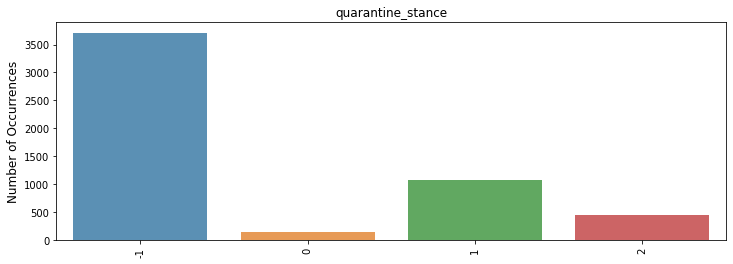

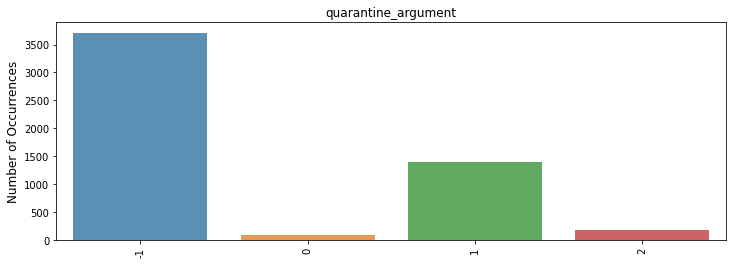

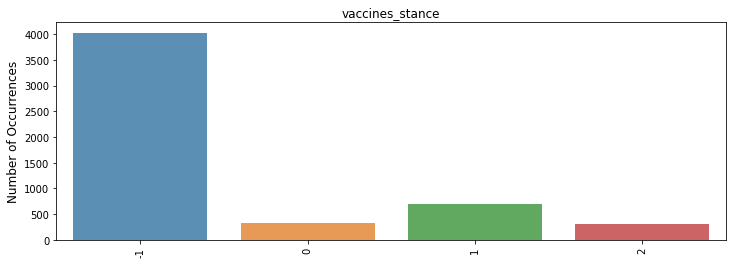

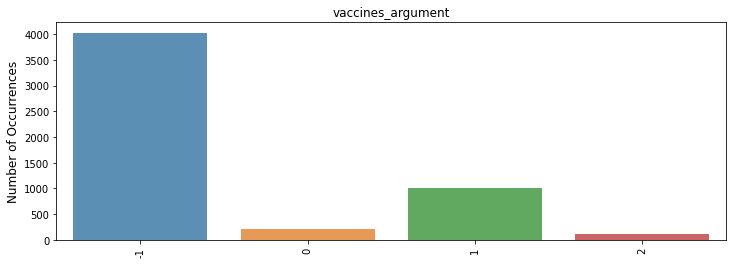

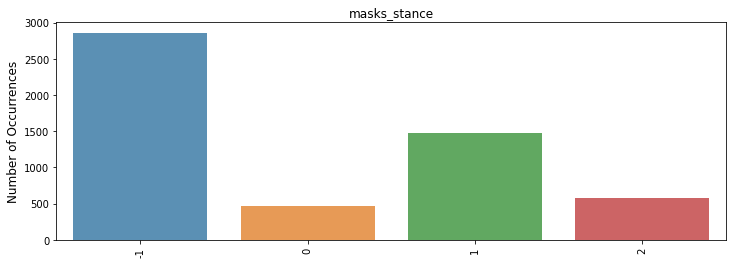

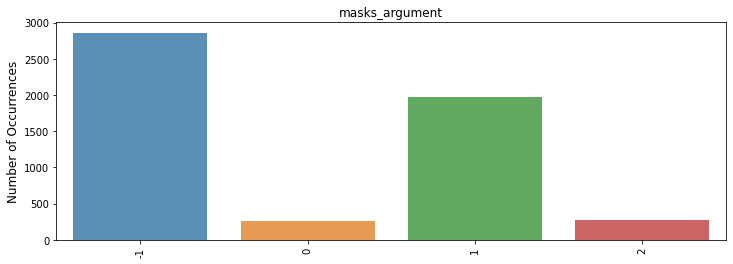

In [ ]:
for class_name in ["quarantine", "vaccines",  "masks"]:
  for case in ['stance', 'argument']:
  
    cnt_pro = train_df[f'{class_name}_{case}'].value_counts()
    plt.figure(figsize=(12,4))
    sns.barplot(x=cnt_pro.index, y=cnt_pro.values, alpha=0.8,)
    plt.xticks(rotation=70)
    plt.ylabel('Number of Occurrences', fontsize=12)
    plt.title(f'{class_name}_{case}')
    plt.xticks(rotation=90)
    plt.show();

### Class distribution after Random Over Sampling

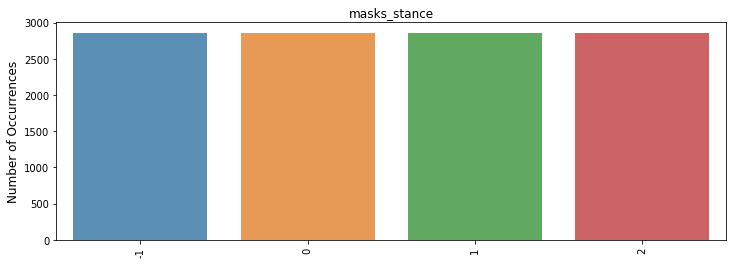

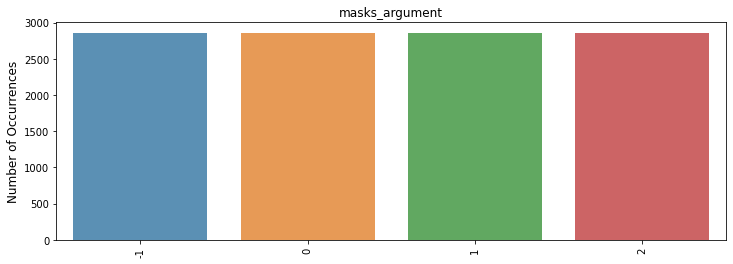

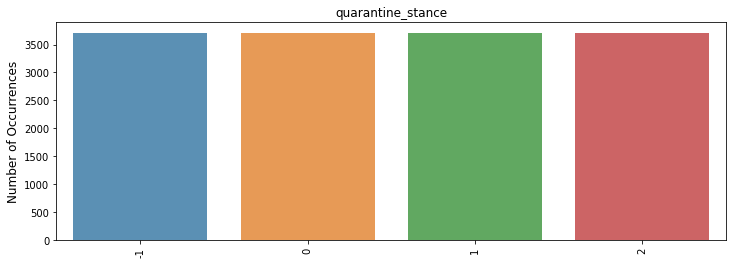

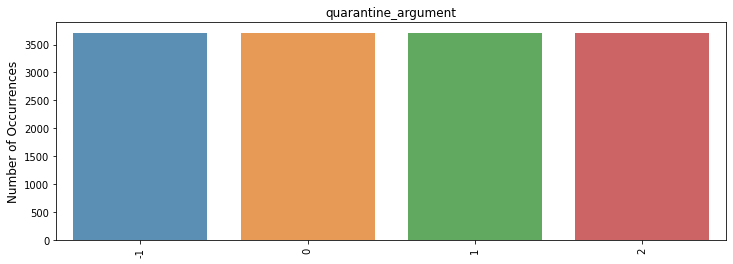

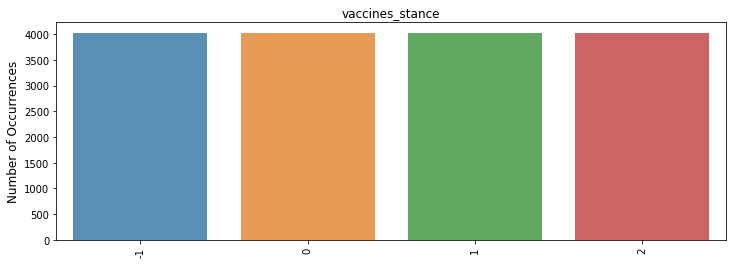

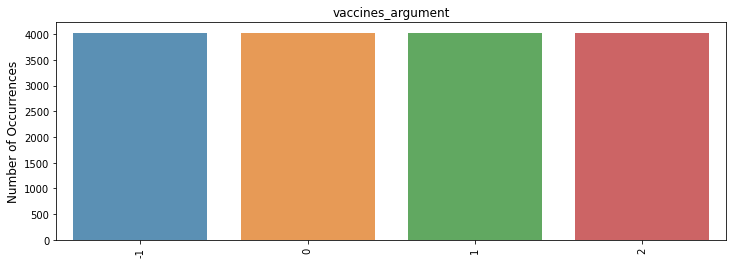

In [ ]:
ros = SMOTE(random_state=42)
from imblearn.over_sampling import SMOTE

oversample = SMOTE()

x_ros_qs_tf, y_ros_qs_tf = oversample.fit_resample(X_train_tf, y_train_qs)
x_ros_qa_tf, y_ros_qa_tf = oversample.fit_resample(X_train_tf, y_train_qa)
x_ros_ms_tf, y_ros_ms_tf = oversample.fit_resample(X_train_tf, y_train_ms)
x_ros_ma_tf, y_ros_ma_tf = oversample.fit_resample(X_train_tf, y_train_ma)
x_ros_vs_tf, y_ros_vs_tf = oversample.fit_resample(X_train_tf, y_train_vs)
x_ros_va_tf, y_ros_va_tf = oversample.fit_resample(X_train_tf, y_train_va)
        
cnt_pro_qs = y_ros_qs_tf.value_counts()
cnt_pro_qa = y_ros_qa_tf.value_counts()
cnt_pro_ms = y_ros_ms_tf.value_counts()
cnt_pro_ma = y_ros_ma_tf.value_counts()
cnt_pro_vs = y_ros_vs_tf.value_counts()
cnt_pro_va = y_ros_va_tf.value_counts()
cnts=[cnt_pro_ms,cnt_pro_ma,cnt_pro_qs,cnt_pro_qa,cnt_pro_vs,cnt_pro_va] 

names=['masks_stance','masks_argument','quarantine_stance','quarantine_argument','vaccines_stance','vaccines_argument']

for i in range(0,6):
    cnt = cnts[i]
    name=names[i]
    plt.figure(figsize=(12,4))
    #plt.hist(cnt)
    sns.barplot(x=cnt.index, y=cnt.values, alpha=0.8)
    plt.ylabel('Number of Occurrences', fontsize=12)
    plt.title(names[i])
    plt.xticks(rotation=90)
    plt.show()


### BERT sequence tagger

In [ ]:
from transformers import BertTokenizer
from transformers import BertForSequenceClassification

import sentence_transformers
from sentence_transformers import SentenceTransformer
import numpy as np

In [ ]:
embedder = SentenceTransformer('DeepPavlov/rubert-base-cased-sentence')
corpus_embeddings=[]
for text in train_df['text_prep']:
    corpus_embeddings.append(embedder.encode(text))
bert_tr=np.stack( corpus_embeddings, axis=0 )
np.savetxt("bert_tr.csv", bert_tr, delimiter=",")

corpus_embeddings=[]
for text in val_df['text_prep']:
    corpus_embeddings.append(embedder.encode(text))
bert_val=np.stack( corpus_embeddings, axis=0 )
np.savetxt("bert_val.csv", bert_val, delimiter=",")
corpus_embeddings=[]
for text in test_df['text_prep']:
    corpus_embeddings.append(embedder.encode(text))
bert_test=np.stack( corpus_embeddings, axis=0 )
np.savetxt("bert_test.csv", bert_test, delimiter=",")
bert_tr=pd.read_csv('bert_tr.csv',header=None)
bert_val=pd.read_csv('bert_val.csv',header=None)

bert_test=pd.read_csv('bert_test.csv',header=None)

Downloading:   0%|          | 0.00/391 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/976 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/642 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/711M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/24.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.65M [00:00<?, ?B/s]

In [ ]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
x_ros_ms_bert, y_ros_ms_bert = oversample.fit_resample(bert_tr, y_train_ms)
x_ros_ma_bert, y_ros_ma_bert = oversample.fit_resample(bert_tr, y_train_ma)

x_ros_qs_bert, y_ros_qs_bert = oversample.fit_resample(bert_tr, y_train_qs)
x_ros_qa_bert, y_ros_qa_bert = oversample.fit_resample(bert_tr, y_train_qa)

x_ros_vs_bert, y_ros_vs_bert = oversample.fit_resample(bert_tr, y_train_vs)
x_ros_va_bert, y_ros_va_bert = oversample.fit_resample(bert_tr, y_train_va)

In [ ]:
embeddings={'train':{'tf-idf':{"masks_stance":x_ros_ms_tf,'masks_argument':x_ros_ma_tf,
                              'quarantine_stance':x_ros_qs_tf,'quarantine_argument':x_ros_qa_tf,
                              'vaccines_stance':x_ros_vs_tf,'vaccines_argument':x_ros_va_tf},
                    'bert':{"masks_stance":x_ros_ms_bert,'masks_argument':x_ros_ma_bert,
                              'quarantine_stance':x_ros_qs_bert,'quarantine_argument':x_ros_qa_bert,
                              'vaccines_stance':x_ros_vs_bert,'vaccines_argument':x_ros_va_bert}},
           'val':{'tf-idf':X_val_tf,'bert':bert_val},
           'test':{'tf-idf':X_test_tf,'bert':bert_test}}

labels={'train':{'tf-idf':{"masks_stance":y_ros_ms_tf,'masks_argument':y_ros_ma_tf,
                              'quarantine_stance':y_ros_qs_tf,'quarantine_argument':y_ros_qa_tf,
                              'vaccines_stance':y_ros_vs_tf,'vaccines_argument':y_ros_va_tf},
                    'bert':{"masks_stance":y_ros_ms_bert,'masks_argument':y_ros_ma_bert,
                              'quarantine_stance':y_ros_qs_bert,'quarantine_argument':y_ros_qa_bert,
                              'vaccines_stance':y_ros_vs_bert,'vaccines_argument':y_ros_va_bert}},
           'val':{"masks_stance":y_val_ms,'masks_argument':y_val_ma,
                              'quarantine_stance':y_val_qs,'quarantine_argument':y_val_qa,
                              'vaccines_stance':y_val_vs,'vaccines_argument':y_val_va},
           'test':{"masks_stance":y_test_ms,'masks_argument':y_test_ma,
                              'quarantine_stance':y_test_qs,'quarantine_argument':y_test_qa,
                              'vaccines_stance':y_test_vs,'vaccines_argument':y_test_va}}

# Model selection


## Target metric 
The main performance metric in each of the two tasks is the macro F1-score (macro F1rel-score), which is averaged first over three relevance classes (the class “irrelevant” is excluded), and then over topics. More precisely, the following procedure is used:

for each of the three claims, F1-score is calculated for each class (label) separately;

F1-scores are averaged over three out of four classes (the “irrelevant” class is excluded) – macro F1rel-score is obtained for a given claim; 

macro F1rel-scores for all three claims are averaged – we get macro F1rel-score relative to the task (stance detection or premise classification).
As a result, two main macro F1rel-scores will be calculated – one for each task. Participants’ systems will be ranked by these metrics (two separate lists). The F1rel-score for claims and F1-score for individual classes (labels) will be considered auxiliary.

## FastText

In [ ]:
def custom_f1(pred_mask,pred_quar,pred_vac,mask,quar,vac):
      # getting f1 for only relevant classes
      f1_masks = f1_score(list(mask), list(pred_mask), labels=[2, 1, 0], average="macro")
      f1_quar = f1_score(list(quar), list(pred_quar), labels=[2, 1, 0], average="macro")
      f1_vac = f1_score(list(vac), list(pred_vac), labels=[2, 1, 0], average="macro")
      return np.mean([f1_masks,f1_quar,f1_vac])
res_data = test_df.copy()
val_preds_i=[]
label = '__class__'
for class_name in tqdm(["quarantine", "vaccines",  "masks"]):
  
  for case in ['stance', 'argument']:
    train_df[f'{class_name}_{case}'] = label + train_df[f'{class_name}_{case}'].astype(str)
    train_df[[f'{class_name}_{case}', 'text_prep']].to_csv('train.txt', index = False, header = None, sep = ' ',
                                                     quoting = csv.QUOTE_NONE, 
                                                     quotechar = "", escapechar = " ")

    ft_model = fasttext.train_supervised('train.txt', label=label, epoch=100, lr=0.1, ws = 6, thread=12) # loss='softmax', wordNgrams=2,
    texts = test_df['text'].to_list()
    val_texts = val_df['text'].to_list()
    preds = ft_model.predict(texts)[0]
    val_preds = ft_model.predict(val_texts)[0]
    val_preds= [int(pred[0].replace(label,'')) for pred in val_preds]
    val_preds_i.append([val_preds,val_df[f'{class_name}_{case}']])
    res_data[f'{class_name}_{case}'] = [pred[0].replace(label,'') for pred in preds]

print(custom_f1(val_preds_i[0][0],val_preds_i[2][0],val_preds_i[4][0],val_preds_i[0][1],val_preds_i[2][1],val_preds_i[4][1]))
print(custom_f1(val_preds_i[1][0],val_preds_i[3][0],val_preds_i[5][0],val_preds_i[1][1],val_preds_i[3][1],val_preds_i[5][1]))

100%|██████████| 3/3 [00:19<00:00,  6.34s/it]

0.3747801429667121
0.35618156612037727


## Logistic Regression

In [ ]:
nltk.download('stopwords')
train_df = pd.read_csv("train.tsv", sep="\t")
test_df = pd.read_csv("test-no_labels.tsv", sep="\t")

res_data = test_df.copy()

label = '__class__'

for class_name in tqdm(["quarantine", "vaccines",  "masks"]):
    tmp_data = categorizer(train_df, class_name=class_name)
    train_data = tmp_data[['text', f'{class_name}_stance', f'{class_name}_argument']]
    for case in ['stance', 'argument']:
        train_df[f'{class_name}_{case}'] = label + train_data[f'{class_name}_{case}'].astype(str)
stopwords = set(nltk_stopwords.words('russian'))
nltk.download('stopwords')  
text_transformer = TfidfVectorizer(stop_words=stopwords, ngram_range=(1, 3), lowercase=True, max_features=150000)


In [ ]:
ros=SMOTE(random_state=42)


def log_reg(C,solver,res_data,X_train_text,X_test_text,train_df):
  for class_name in tqdm(["quarantine", "vaccines",  "masks"]):
      for case in ['stance', 'argument']:
          x_ros, y_ros = ros.fit_resample(X_train_text, train_df[[f'{class_name}_{case}']])
          logit = LogisticRegression(C=C, solver=solver, multi_class='multinomial', random_state=17, n_jobs=4)
          logit.fit(x_ros, y_ros)
          res_data[f'{class_name}_{case}'] = logit.predict(X_test_text)
  return res_data
res_data = test_df.copy()



#### Choose training features

In [ ]:
#TF-IDF no aug
X_train_text = text_transformer.fit_transform(train_df['text'])
X_test_text = text_transformer.transform(test_df['text'])

#TF-IDF aug
#X_train_text = text_transformer.fit_transform(new_tr_df['text'])
#X_test_text = text_transformer.transform(test_df['text'])

#BERT SENTENCE
#X_train_text=bert_tr
#X_test_text=bert_test





### Choose parameters

In [ ]:
C=5
solver='newton-cg'


### Run a model

In [ ]:
res_data=log_reg(C,solver,res_data,X_train_text,X_test_text,train_df)

In [ ]:
# postprocessing
for col in res_data.columns:
  if 'text' not in col:
    #res_data[col] = res_data[col].astype(int) - 1
    res_data[col] = res_data[col].apply(lambda x : x[-1]).astype(int) - 1

for claim in ["quarantine", "vaccines",  "masks"]:
  res_data.loc[(res_data[f'{claim}_stance'] == -1) & (res_data[f'{claim}_argument'] != -1), [f'{claim}_argument']] = -1
  res_data.loc[(res_data[f'{claim}_stance'] > -1) & (res_data[f'{claim}_argument'] == -1), [f'{claim}_argument']] = 0
res_data
res_data.to_csv(f'logreg.tsv', index = False, sep='\t')
!zip logreg.zip logreg.tsv

,text_id,text,masks_stance,masks_argument,quarantine_stance,quarantine_argument,vaccines_stance,vaccines_argument
0,17059,Каникулы только дадут почву для распостранения...,-1,-1,2,1,-1,-1
1,17072,"Думал спокойно посидим в небольшой компании, п...",-1,-1,1,1,-1,-1
2,17077,"[USER], в Китае болезнь гуляет с декабря, прос...",-1,-1,2,1,-1,-1
3,17082,если переболела бессимптомно добрая треть насе...,-1,-1,2,1,-1,-1
4,17089,А подготовка подразумевает собой массовое скоп...,-1,-1,1,1,-1,-1
...,...,...,...,...,...,...,...,...
1397,33948,"интересная штука, но лучше точно быть уверенны...",-1,-1,-1,-1,2,1
1398,33957,Если все обещанные варианты вакцины в скором в...,-1,-1,-1,-1,2,1
1399,33960,"Скоро вакцина от этой заразы станет доступной,...",-1,-1,-1,-1,2,1
1400,33993,"Трудности конечно есть, но в конце года каждый...",-1,-1,-1,-1,2,1


### GridSearch For Logistic Regression

In [ ]:
train_df,val_df=sklearn.model_selection.train_test_split(train_df, train_size=0.8, random_state=42)

params = {'penalty':['l1', 'l2'],
          'C':[3,4,5,6,7,8,10]}

grid_search_f1={'penalty':[],
                'C':[],
               'f1':[]}

for pen in params['penalty']:
    for c in params['C']:
        logreg = LogisticRegression(random_state=42,multi_class='multinomial',
                                n_jobs=-1,
                                max_iter=1000,
                                solver='saga',
                                penalty=pen,
                                C=c)
        resulted_f1=[]
        for key in embeddings['train'].keys():

          predicitons=[]

          for key_target in embeddings['train'][key].keys():

            logreg.fit(embeddings['train'][key][key_target], labels['train'][key][key_target])

            y_pred=logreg.predict(embeddings['val'][key])

            predicitons.append([y_pred,labels['val'][key_target]])
          # calculate average f1 for certain embedding type
          f1_stance=custom_f1(predicitons[0][0],predicitons[2][0],predicitons[4][0],predicitons[0][1],predicitons[2][1],predicitons[4][1])
          f1_argument=custom_f1(predicitons[1][0],predicitons[3][0],predicitons[5][0],predicitons[1][1],predicitons[3][1],predicitons[5][1])
          resulted_f1.append([key,f1_stance,f1_argument])
        grid_search_f1['penalty'].append(pen)
        grid_search_f1['C'].append(c)        
        grid_search_f1['f1'].append(resulted_f1)

        exDict = {f'{pen}_{c}': grid_search_f1}

        with open('file.txt', 'w') as file:
          file.write(json.dumps(exDict))
grid_search_f1

# Voting1

In [ ]:
ros = RandomOverSampler(random_state=42)
ros=SMOTE(random_state=42)
res_data = test_df.copy()
train_df = pd.read_csv("train.tsv", sep="\t")
test_df = pd.read_csv("test-no_labels.tsv", sep="\t")
for class_name in tqdm(["quarantine", "vaccines",  "masks"]):
    for case in ['stance', 'argument']:
        x_ros, y_ros = ros.fit_resample(X_train_text, train_df[[f'{class_name}_{case}']])
        clf1 = LogisticRegression(C=5, solver='newton-cg', multi_class='multinomial', random_state=17, n_jobs=4)
        clf1.fit(x_ros, y_ros)
        pred1=clf1.predict(X_test_text)
        clf2 = LogisticRegression(penalty='l1',C=3, solver='saga', multi_class='multinomial', random_state=17, n_jobs=4)
        clf2.fit(x_ros, y_ros)
        pred2=clf2.predict(X_test_text)

        clf3 = RandomForestClassifier(max_depth=8,n_estimators=50, n_jobs=4)
        clf3.fit(x_ros, y_ros)
        pred3=clf3.predict(X_test_text)

        clf4 = RandomForestClassifier(max_depth=4,n_estimators=100, n_jobs=4)
        clf4.fit(x_ros, y_ros)

        pred4=clf4.predict(X_test_text)

        clf5 = LogisticRegression(penalty='l2',C=10, solver='newton-cg', multi_class='multinomial', random_state=17, n_jobs=4)
        clf5.fit(x_ros, y_ros)
        pred5=clf5.predict(X_test_text)



        arrays = [pred1,pred2,pred3,pred4,pred5]
        result = scipy.stats.mode(np.stack(arrays), axis=0)
        final_pred=result.mode[0]
        
        

        res_data[f'{class_name}_{case}'] = final_pred

# postprocessing

res_data.to_csv('voting1.tsv', index = False, sep='\t')
!zip voting1.zip voting1.tsv

## Voting 2

In [ ]:
ros=SMOTE(random_state=42)
res_data = test_df.copy()


for class_name in tqdm(["quarantine", "vaccines",  "masks"]):
    for case in ['stance', 'argument']:
        x_ros, y_ros = ros.fit_resample(X_train_text, train_df[[f'{class_name}_{case}']])
        clf1 = LogisticRegression(C=5, solver='newton-cg', multi_class='multinomial', random_state=17, n_jobs=4)
        clf1.fit(x_ros, y_ros)
        pred1=clf1.predict(X_test_text)
        clf2 = LogisticRegression(penalty='l2',C=3, solver='saga', multi_class='multinomial', random_state=17, n_jobs=4)
        clf2.fit(x_ros, y_ros)
        pred2=clf2.predict(X_test_text)


        clf5 = LogisticRegression(penalty='l2',C=10, solver='newton-cg', multi_class='multinomial', random_state=17, n_jobs=4)
        clf5.fit(x_ros, y_ros)
        pred5=clf5.predict(X_test_text)



        arrays = [pred1,pred2,pred5]
        result = scipy.stats.mode(np.stack(arrays), axis=0)
        final_pred=result.mode[0]
        
        

        res_data[f'{class_name}_{case}'] = final_pred

# postprocessing

res_data.to_csv('voting2.tsv', index = False, sep='\t')
!zip voting2.zip voting2.tsv

## Voting 3

In [ ]:
ros=SMOTE(random_state=42)

res_data = test_df.copy()

for class_name in tqdm(["quarantine", "vaccines",  "masks"]):
    for case in ['stance', 'argument']:
        x_ros, y_ros = ros.fit_resample(X_train_text, train_df[[f'{class_name}_{case}']])
        clf1 = LogisticRegression(C=3, solver='newton-cg', multi_class='multinomial', random_state=17, n_jobs=4)
        clf1.fit(x_ros, y_ros)
        pred1=clf1.predict(X_test_text)
        clf2 = RandomForestClassifier(max_depth=4,n_estimators=100, n_jobs=4)
        clf2.fit(x_ros, y_ros)

        pred2=clf2.predict(X_test_text)
        



        arrays = [pred1,pred2]
        result = scipy.stats.mode(np.stack(arrays), axis=0)
        final_pred=result.mode[0]

        res_data[f'{class_name}_{case}'] = final_pred

# postprocessing

res_data.to_csv('voting3.tsv', index = False, sep='\t')
!zip voting3.zip voting3.tsv